# Part 1 : Sampling and filtering

In this part of the lab work, we are going to look at the frequency content of images, and certain filtering operations which which we can carry out.

__IMPORTANT NOTE__ : in this part of the TP, we will avoid using plt.imshow(). Indeed, if you use imshow to display an image, it will change the resolution of this image (unless you specify the size of the figure manually). Since we are going to be looking at aliasing effects (which are induced precisely by changing resolution), it is better to write the output to an image file and view it in a separate program.

### Your task

In the lab work, you must fill in the code in the places marked FILL IN CODE, or answer the written questions directly on the notebook.

First, let us load the necessary packages

In [0]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import color
import cv2


The last package will help us to carry out the convolution operation. Let's define two functions to read and write and image :

In [0]:
def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))

In [0]:
file_dir = 'images/'
file_name = 'boston'
file_ext = '.png'
img_gray,_ = read_image(file_dir+file_name+file_ext)
img_gray.shape

(600, 600)

## Frequency content

Firstly, we are going to inspect the frequency content of the image. Write a function to display the magnitude of the spectrum of the image. For this, you can use the following functions

- ``np.fft.fft2``
- ``np.fft.fftshift``

The first calculates the 2D Fast Fourier Transform of the image. The second centres the spectrum, such that the 0 frequency is centred in the image. Otherwise the 0 point is set at the top left, which is not very conveniant for visualisation.

A final note. It is often the case that the 0 frequency is of much larger amplitude than the other frequencies. Therefore, we often visualise log(1+spectrum_magnitude) rather than spectrum_magnitude itself.

Write this function ``display_spectrum`` now.

In [0]:
def display_spectrum(img):
   f = np.fft.fft2(img)
   fshift = np.fft.fftshift(f)
   magnitude_spectrum = np.log(1+np.abs(fshift))
   plt.figure(figsize=(10,10))
   plt.subplot(121),plt.imshow(img, cmap = 'gray')
   plt.title('Input Image')
   plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
   plt.title('Magnitude Spectrum')
   plt.show()
   

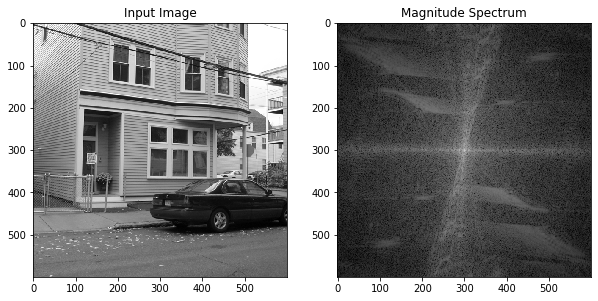

In [0]:
display_spectrum(img_gray)

__Question__ : What do you observe in the frequency domain ? What is your interpretation of this image ?

__Answer__ :

**Fourier analysis** is used in image processing in much the same way as with one-dimensional signals. However, images do not have their information encoded in the frequency domain, making the techniques much less useful. For example, when the Fourier transform is taken of an audio signal, the confusing time domain waveform is converted into an easy to understand frequency spectrum. In comparison, taking the Fourier transform of an image converts the straightforward information in the spatial domain into a scrambled form in the frequency domain. In short, don't expect the Fourier transform to help you understand the information encoded in images.

Likewise, don't look to the frequency domain for filter design. The basic feature in images is the edge, the line separating one object or region from another object or region. Since an edge is composed of a wide range of frequency components, trying to modify an image by manipulating the frequency spectrum is generally not productive. Image filters are normally designed in the spatial domain, where the information is encoded in its simplest form. Think in terms of smoothing and edge enhancement operations  rather than high-pass and low-pass filters . 

**Fourier Analysis** is a special case of a concept called orthogonal functions. The basic idea is that you break down a complicated signal into a linear superposition of simpler "basis" functions. You can do your processing or analysis on the basis functions and then sum the results for the basis functions to get the result for the original signal.

**The 2D FFTs** are accomplished using fft2.  The image files are imported as **uint8**, so they should be converted to double arrays before doing the FFTs.  The FFT of real, non-even data is complex, so the magnitude and phase of the **2D FFTs** should be displayed.  The function fftshift is used shift the quadrants of the FFT around to see the lowest frequencies in the center of the plot.

**Look at the FFTs of the image.**  Most of the **energy** in the Fourier domain is present in the center of the image, which corresponds to **low frequency** data in the image domain.  This corresponds to the many **gradual changes** in the images.  However, the FFT  has a diagonal line intersecting the center of the plot.  This line is perpendicular to the edge of the wall in the original image.  A strong line across an image will produce a perpendicular line in its FFT.  Additionally, image has more sharp, geometric features , so there is more **energy** in the higher frequencies, away from the center of the FFT.

The phase of the FFTs is somewhat hard to interpret visually and generally looks like noise.  However, the phase holds a great deal of the information needed to reconstruct the image.  To demonstrate the role of the phase of the FFT, We switched the magnitude and phase of the  image in the Fourier domain then performed an inverse 2D FFT to view the results. 

## Subsampling and aliasing

We are now going to carry out a ''direct'' subsampling (also known as a ''nearest neighbours'' subsampling) of a factor $\delta$, that is to say we simply take one out of every $\delta$ pixels. Fill in the following function to do this :

In [0]:
def nn_subsampling(img_in,delta):
    
    return img_in[0::delta,0::delta]
    

Write the subsampled image, with subsampling step $\delta = 2$

In [0]:
delta = 2
image_small = nn_subsampling(img_gray,delta)
write_image(np.array(image_small), file_name+'_subsampled.png')

In [0]:
write_image(np.array(img_gray), file_name+'.png')

__Question__ What do you notice about the image ? Where is the aliasing taking place ? Why is it taking place in these specific regions ?

__Answer__ : 

In **digital signal processing**, downsampling, compression,and decimation are terms associated with the process of resampling in a multi-rate digital signal processing system. Both downsampling and decimation can be synonymous with compression, or they can describe an entire process of bandwidth reduction (filtering) and sample-rate reduction.   When the process is performed on a sequence of samples of a signal or other continuous function, it produces an approximation of the sequence that would have been obtained by sampling the signal at a lower rate.



**Digital sampling** of any signal, whether sound, digital photographs, or other, can result in apparent signals at frequencies well below anything present in the original. **Aliasing** occurs when a signal is sampled at a less than twice the highest frequency present in the signal. Signals at frequencies above half the sampling rate must be filtered out to avoid the creation of signals at frequencies not present in the original sound. Thus digital sound recording equipment contains low-pass filters that remove any signals above half the sampling frequency.

**Aliasing** Occurs when the spatial sampling rate is not high enough to **capture the details in the image**.High frequencies are transformed to lower frequencies (i.e. **aliases**) .


The **repeat pattern** does not look much like the original image, and the most obvious repeat pattern vertically and horizontally is at a frequency very different from that of the original image. The **repeat pattern**  are still in there, but they are nearly completely obscured by the dominant horizontal bands and bright dots that result from aliasing.

We have seen two different methods of filtering an image before subsampling to remove high frequencies :

- Ideal low-pass filter
- Gaussian filter

We recall that the convolution operation, which defines a filter, can be carried out either in the time domain or the frequency domain.

### Ideal low-pass filter

Write a function which filters an input image via the frequency domain, with the input filter ``f_hat`` defined in the frequency domain. The output ``img_out`` should be in the spatial domain. You can use the ``np.fft.ifft2`` function to carry out the inverse Fourier transform. Make sure to take the __real__ part of the output image (``np.real``).

In [0]:
def filter_image(img,f_hat):
    f = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shifted = np.fft.fftshift(f)
    f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
    f_filtered = f_hat * f_complex

    f_filtered_shifted = np.fft.fftshift(f_filtered)
    inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
    filtered_img = np.abs(inv_img)
    print(np.min(np.real(inv_img)))
    print(np.max(np.real(inv_img)))
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img*255 / filtered_img.max()
    img_out = filtered_img.astype(np.uint8)

    
    return(img_out)

Now, create a function ``ideal_low_pass_filter`` which returns an ideal low-pass filter $\hat{h}$ in the frequency domain. We recall that in 2D this is a disk centred on the 0-frequency (with the radius $\nu_0$ which is the cut-off freqeuncy).

### Creating the disk (low-pass filter) in the frequency domain 

By definition the 0 frequency is at the top left point of the image. Therefore, you have two options to create the filter :

- you can create the low-pass filter in the 'normal' frequency-domain representation, with the 0 frequency at the (0,0) position of the frequency image)
- you can create the low-pass filter in the 'centred' position and then ifftshift the frequency image. In the centred representation of the frequency, for an image of even size $n=2a$, the 0 frequency position is located at position $a$ (where 0 is the first position - the '0 indexing' of python).

To go between the two representations, you have the following functions :

- np.fft.fftshift : top-left centre -> middle centre
- np.fft.ifftshift : middle centre -> top-left centre

To create the disk centred at the position $a$, you have several options :

- use a loop (simplest, but potentially slow)
- use the 'distance transform' ``scipy.ndimage.morphology.distance_transform_edt``. This function calculates the distance to the nearest pixel which has a value of 0 in a binary image (this is a mathematical morphology function)
- use the np.meshgrid function, (https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) which creates a grid of positions (in 1D, 2D, etc - here we are interested in 

In [0]:
from scipy.ndimage.morphology import distance_transform_edt

def ideal_low_pass_filter(img_shape,nu_0):
    
    m= np.ones(img_shape)
    ic,jc = int((img_shape[0]-1)/2), int((img_shape[1]-1)/2)
    m[ic,jc] = 0
    
    return (distance_transform_edt(m) <nu_0*img_shape[0])


__Question__ Given that in an image with sampling rate 1 (the pixel size) the frequencies in the original image of size $n \times n$ go from $-\frac{1}{2}$ to $\frac{1}{2}$.  For a subsampling of $\delta=2$, where should the cutoff frequency $\nu_0$ be set for correct subsampling ?

__Answer__ : 

To avoid aliasing the sampling rate must be at least two times the maximum frequency in the image at least two samples per cycle .This minimum sampling rate is called the Nyquist rate.Aliasing can be avoided by **low-pass filtering** the image before downsampling.

We have to think about the change in Nyquist frequency between both images. If the Nyquist frequency of the original image is N, the downsampled image will have a lower Nyquist frequency, xN, where x is related to the ratio of sizes between the final image and the initial one. You would need to remove those spatial frequencies which are higher than xN in the original image before downsampling it.


If a **discrete-time signal's** baseband spectral support is not limited to an interval of width $\frac{2\pi}{M} $ radians, downsampling by M results in aliasing. Aliasing is the distortion that occurs when overlapping copies of the signal's spectrum are added together. The more the signal's baseband spectral support exceeds $\frac{2\pi}{M} $ radians, the more severe the aliasing. Demonstrate aliasing in a signal downsampled by two. The signal's baseband spectral support exceed $\pi $ radians in width.

The frequency scaling corresponds to having a sampling interval of $ T=1$ after downsampling, which corresponds to the interval $T=\frac{1}{M} $ prior to downsampling. 

The aliasing theorem makes it clear that, in order to downsample by factor $ M$ without aliasing, we must first lowpass-filter the spectrum to (-$\frac{\pi}{M} $  ,$\frac{\pi}{M} $ ) . This filtering when ideal zeroes out the spectral regions which alias upon downsampling. 

**In our case** the interval will be (-$\frac{1}{4} $  ,$\frac{1}{4} $ )



Create f_hat, the ideal low-pass filter in the frequency domain, and display it.

In [0]:
img_shape = img_gray.shape
print(img_shape)


(600, 600)


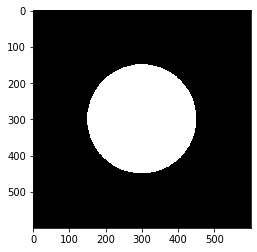

In [0]:
nu_0 =0.25 #FILL IN THIS VALUE
f_hat = ideal_low_pass_filter(img_shape,nu_0)
plt.imshow(f_hat,cmap='gray')

Carry out the filtering, and subsample the image again, and imwrite the result.

You should observe that the range of the image is not respected. Make sure to rescale the output image to the range $0, \dots, 1$ before writing it.

__Bonus question__ Why do you think this happens ?

__Answer__ :

The filter we create in the frequency domain is only an approximation to the filter we want to create. The problem is that we are dealing with the DFT here, not the continuous-domain FT with its infinite frequencies. The Fourier transform of a image is indeed is infinitely large  it is not band-limited.

By sampling this function only within a window, We are effectively multiplying it with an ideal low-pass filter . This low-pass filter, in the spatial domain, has negative values. Therefore, the filter we create also has negative values in the spatial domain.


One way to overcome this ringing is to apply a windowing function in the frequency domain. A windowing function is typically applied in the spatial domain to avoid issues with the image border when computing the FFT. Here, We propose to apply such a window in the frequency domain to avoid similar issues when computing the IFFT. This will always further reduce the bandwidth of the kernel , and therefore yield a smoother transition of foreground to background in the spatial domain . The best known windowing functions are Hamming and Hann windows, but there are many others worth trying out.


The output from **FFT2** is always a double. Therefore, the rest of the sequence of operations will be working with doubles. The image arithmetic functions maintain the types of the input. Therefore, they will treat the data as doubles, even though you may have intended for them to be treated like the original image. When you use the image arithmetic functions on a double, it is also possible to produce negative results, because the output will be a double array. Finally, the output from **IFFT2** is also always a double and could contain negative values. Therefore, the result of the sequence of operations will be an array of double, instead of the original type.

To work around this issue, you should use IM2DOUBLE to convert the image data to a double, perform the operations, and then convert back to the original data type.





In [0]:
img_filtered = filter_image(img_gray,f_hat)

img_filtered =(img_filtered -img_filtered.min())/(img_filtered.max()-img_filtered.min()) # FILL IN NORMALISATION TO RANGE 0, ..., 1

img_filtered = nn_subsampling(img_filtered,delta)

write_image(img_filtered,file_name+'_filtered_ideal_low_pass.png')

-0.016270186727052383
1.146014122786957


__Question__ Is the aliasing reduced ? What effect do you notice in the output ? What is this called ?

__Answer__

With an **ideal lowpass filter**,what will happen is that you will see ringing effects when you lowpass filter. The reason why is because this comes straight from signal processing theory. It requires a large or rather infinite number of sinusoids in the spatial domain to realize a hard edge in the frequency domain.The FFT is a decomposition of your signal in terms of sinusoids. When you use this lowpass filter to filter your image, this is visualized as ringing in the reconstructed image as hard edges need a large summation of sinusoids hence the fact the ringing to create them. 

The main cause of ringing artifacts is due to a signal being bandlimited specifically, not having high frequencies or passed through a low-pass filter; this is the frequency domain description. In terms of the time domain, the cause of this type of ringing is the ripples in the sinc function, which is the impulse response time domain representation of a perfect low-pass filter. Mathematically, this is called the **Gibbs phenomenon**. 

The ringing comes from the hard edges of our filter in the frequency domain. People tend to use a more gradual decrease in magnitude as you move farther away from the centre. A good example is a **Gaussian blur**. 

### Gaussian filter

Now, we are going to carry out the filtering with a Gaussian filter. Create a function ``gaussian_filter`` which returns a 2D Gaussian filter, defined as :

$g_\sigma(x,y) = \frac{1}{2 \pi \sigma^2} \exp{ \left( - \frac{x^2+y^2}{2\sigma^2} \right)}$

To create a grid of pixel positions, you can use the ``np.meshgrid`` function.

You must again make sure to carry out an ``ifftshift`` to make sure the filter is in the correct format. Be careful to put the middle of the Gaussian at the centre position ($a$).

In [0]:
def gaussian_filter(img_shape,sigma):
   
    m = np.ones(img_shape)
    ic,jc = int((img_shape[0]-1)/2), int((img_shape[1]-1)/2)
    m[ic,jc] = 0
    sigma = sigma*img_shape[0]
    gauss = lambda x: np.exp(-x**2/(2*sigma**2))/ (2*np.pi*sigma**2) 
    m = [gauss(el) for el in distance_transform_edt(m).flatten()]
    return np.array(m).reshape(img_shape)

Now, create a Gaussian filter in the frequency domain to attenuate the frequencies higher than the previous cutoff frequency you used above, $\nu_0$. To do this, we recall that 95.45 percent of the energy of a Gaussian function is contained within $\pm 2\sigma$. Fix $\sigma$ accordingly. Display the filter.

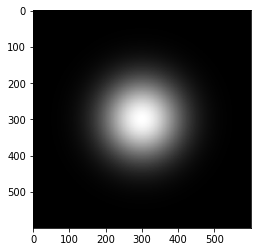

In [0]:
sigma =nu_0/2  
g_hat = gaussian_filter(img_gray.shape,sigma)
plt.imshow(g_hat,cmap='gray')

Now, carry out the filtering with the Gaussian filter in the frequency domain. Remember to renormalise the output image.

In [0]:
img_filtered = filter_image(img_gray,g_hat)
# FILL IN NORMALISATION TO 0 ... 1
img_filtered =(img_filtered -img_filtered.min())/(img_filtered.max()-img_filtered.min())
img_filtered = nn_subsampling(img_filtered,delta)

write_image(img_filtered,file_name+'_filtered_gaussian.png')

9.478501109857238e-07
2.8289259379196276e-05


__Question__ Do you still observe the problem observed in the case of the ideal low-pass filter ? Why ?

__Answer__

Blurring is often another word for low-pass filtering. When an image contains high-frequency content fast variations, downsampling can produce visually weird or annoying aliasing or moiré artifacts. According to digital sampling theory, signals should be properly bandlimited, before they are downsampling.

A digital filter limits the bandwidth of the signal and makes it suitable for downsampling without aliasing.

The Sampling Theorem states that sampling a signal at  twice its smallest wavelength is enough. Which means that downsampling cuts frequencies above the Nyquist limit . In other words Downsampling means less data to process, but at the expense of introducing an error.

Fortunately, a Gaussian blur is a form of low-pass frequency filter. This means that blurring is quite tolerant to alterations in the high part of the frequency spectrum.A Gausssian filter is very suitable as a filter, as it has a number of nice features. The Gaussian function is mathematically tractable. It has sufficient frequency attenuation. It has small time domain footprint. It has little noticeable artefacts. Therefore it's the programmers choice in image processing. 

To prevent aliasing, we have to make sure that the signal is band-limited before we do the sampling. We then use appropriate low-pass filters for that. In theory, the best possible filter is the one where all frequencies above the sampling rate are suppressed. It turns out this strategy exhibits severe visual artifacts such as ringing, due to what is called Gibbs phenomenon . The solution for that is to use filters with a higher degree of continuity. The consequence is called in-spectrum energy loss we will reduce the energy of frequencies allowed by the sampling rate we use so that there will be less visual artifacts. People tend to use a more gradual decrease in magnitude as you move farther away from the centre. A good example is a **Gaussian blur**. 

__Bonus Question__ We have had to rescale the output image again. This time, why was this the case ? Hint : think about a Gaussian filter in the spatial domain with a very large $\sigma$.

__Answer__


A real-valued image has a complex conjugate symmetry in the Fourier domain. This means that the FFT of the image will have a specific symmetry. Any processing that you do must preserve this symmetry if you want the inverse transform to remain real-valued. If you do this processing wrong, then the inverse transform will be complex-valued, and probably non-sensical.

If you **preserve the symmetry** in the Fourier domain properly, then the imaginary component of the inverse transform will be **nearly zero**. Discarding this imaginary component is the correct thing to do. **Computing the magnitude will yield the same result**, except all negative values will become positive .Some filters are meant to produce negative values, such as derivative filters, and at an increased computational cost.

Some filters are specifically designed to **break the symmetry**.The **Gaussian smoothing** can be performed using standard convolution methods. The convolution can in fact be performed fairly quickly since the equation for the 2-D isotropic Gaussian  is separable into x and y components. Thus the 2-D convolution can be performed by first convolving with a 1-D Gaussian in the x direction, and then convolving with another 1-D Gaussian in the y direction.The **Gaussian is in fact the only completely circularly symmetric** operator which can be decomposed in such a way **he preserve the symmetry** in the Fourier domain properly.Computing the **magnitude** will yield to a values  **nearly zero**.

## Standard filters

In this section, we are going to look at some common filters, and see their effects on images. From this point on in the TP, we are going to be working in the spatial domain, and are no longer concentrated on aliasing. Therefore, we can use the plt.imshow function (you may notice some aliasing, but we ignore it here). We define a display function now.

In [0]:
def display_image(img_in):
    plt.imshow(img_in,cmap='gray')

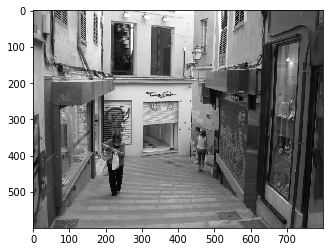

In [0]:
file_dir = 'images/'
file_name = 'palma'
file_ext = '.png'
img_gray,_ = read_image(file_dir+file_name+file_ext)
display_image(img_gray)

Now, write a function ``filter_image_spatial`` which carries out the 2D convolution between two images in the spatial domain. For this, you can use the ``convolve2d`` from the scipy.signal package. In this convolution, you should use the following parameters :

- mode='same'. This means that the output size of the image will be the same as the input
- boundary='symm'. For values outside the image domain, we take the symmetrical values of the image

Strictly speaking, if we take the Fourier transform of an image, we are using periodic boudary conditions. However, at this point we no longer need the frequency representation of the image, so we can define the conditions as we wish.

In [0]:
from scipy import signal

def filter_image_spatial(img,f):
    img_out = signal.convolve2d(img, f, boundary='symm', mode='same') 
    return(img_out)

Now, define the filters grad_y and grad_x which give the derivatives of the image in the $y$ and $x$ directions, respectively (see lesson slides). Note : you must define these filters in the spatial domain, and make sure that they are matrices (otherwise the dimensions will not match with those of the image);

In [0]:
grad_x = np.array([-1,1]).reshape(1,-1) 
grad_y =np.array([-1,1]).reshape(-1,1) 

In [0]:
grad_x

array([[-1,  1]])

In [0]:
grad_y

array([[-1],
       [ 1]])

Filter the input image and display the results of these two filterings

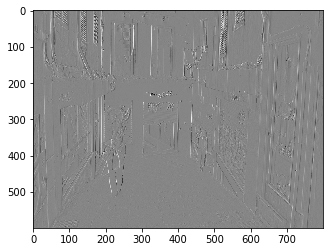

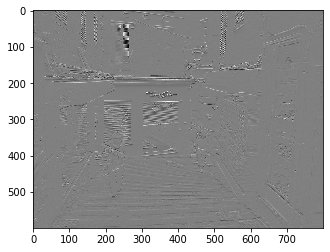

In [0]:
img_grad_x = filter_image_spatial(img_gray,grad_x)
img_grad_y = filter_image_spatial(img_gray,grad_y)

display_image(img_grad_x)
plt.figure()
display_image(img_grad_y)

### Image sketch (edge detection)

Suppose we wish to create a sketch of our image, with just the outlines of object. Propose a (simple) method to create a binary image where the edges are detected (using a threshold parameter $\tau$). Implement this in a function called ``sketch_image``, and apply it to the input image. Display it (you can write it as well to view it better).

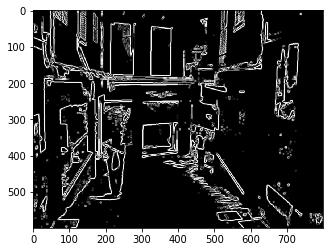

In [0]:
import scipy.ndimage

from skimage import data
from skimage import filters
from skimage.filters import threshold_local,threshold_mean
def sketch_image(img_in,tau):
    binary = img_in > tau
    gaussian = filters.gaussian(binary)
    edged = filters.sobel(gaussian)
 

    return edged   
    

tau =threshold_mean(img_gray)
img_sketch = sketch_image(img_gray,tau)
display_image(img_sketch)
write_image(img_sketch, file_name+'_sketch.png')

Depending on the threshold parameter used in your algorithm, the sketch may have a certain thickness. Ideally, we would like to have a sketch of one-pixel thickness. This is something we would like to avoid in the sketch. Propose a solution (using the information in the lesson) to this using morphological operators, and implement it. You can find the necessary function in the following package (do not reimplement this operation, there is alread a function which exists) :

- skimage.morphology

In [0]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import disk


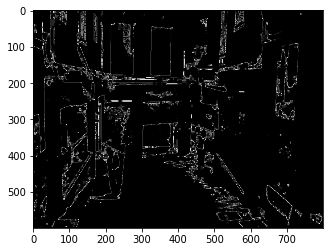

In [0]:
img_sketch_skeleton =erosion(img_sketch, disk(2)) # FILL IN CODE
display_image(img_sketch_skeleton)
write_image(img_sketch_skeleton, file_name+'_sketch_skeleton.png')